<a href="https://colab.research.google.com/github/swleegit/Hongong_ML/blob/main/04_02%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법
- 실제 데이터는 방대하며, 매일 새로운 데이터가 추가됨.

- 기존 데이터 + 새로운 데이터를 통으로 매일 학습 --> 큰 크기의 데이터를 한번에 학습하면 데이터 손실이 있을 수 있으며, 이를 한번에 학습하기 위한 비용도 많이든다.

- 전체 데이터의 개수를 일정하게 유지 : 데이터의 양을 조절하는 과정에서 중요 데이터 손실가능성 커짐 .

제일 좋은 방법은 기존 데이터로 학습한 것에 이어서 새로 추가되는 데이터에 대해서만 추가학습하여 최종 반영하는 방법 

- 이런식의 훈련 방식을 **점진학습** 또는 **온라인 학습**이라고 한다.

- 대표적인 점진적학습 알고리즘으로는 **확률적 경사 하강법(Stochastic Gradient Descent)**이 있다.

- 당연히 사이킷런에서 확률적 경사 하강법을 위한 클래스(추정기)를 제공한다.



ex)새로운 샘플 (50개 가정)  

- 확률적 : 50개의 샘플 중 무작위로 한개의 샘플을 골라 이를 이용하여 **학습**한다.  
여기서 **학습**이란 산(손실함수)의 현재 위치에서 가장 가파른 경사를 찾아 **조금씩**내려가는 것을 의미한다.  
- **조금씩**내려가는 이유는 실제로 산(손실함수)는 상상할 수 없는 복잡한 형상이며, 많이 내려왔다가는 최저의 손실함수 값을 지나칠 수 있기 때문이다.  

- 샘플 한개에 대해 하강했다면, 그 다음 샘플에 대해 **이어서** **학습(=하강)한다.** 이렇게 50개의 샘플을 모두 비우면 **1 epoch**한 것.

- 이어서 학습하기 때문에 기존 데이터를 통으로 다시 학습 할 필요없이 기존 정보를 유지한체 새로운 데이터에 대한 학습이 가능하다.

- 어디까지 하강하는가?(=목표는 무엇인가?)  
만족할 수 있는 위치가 목표이다.   
산(손실함수)의 최솟값은 알지 못한다. 자세히 말하자면, 이전 샘플과 비교시 일정이상 차이가 없다면 그만둔다.(또는 설정한 epoch가 목표)


- 여러개의 샘플을 사용해 경사 하강법 : 미니배치 경사 하강법(minibatch gradient descent)

- 전체 샘플을 이용해 경사 하강법 : 배치 경사하강법(batch gradient desent)  
모든 데이터를 사용하기 때문에 가장 안정적인 방법이 될 수 있지만, 컴퓨터 자원을 많이 사용하고 데이터가 너무 많으면 한번에 전체 데이터를 모두 읽을 수 없을 수도 있다.
  
<img src = "https://drive.google.com/uc?id=1v6qCU9YfNHiZzQcuc0qEDjfyjhBOAWew">

# 손실함수(loss function)
- 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지(답(target)과 예측간의 차이)를 측정하는 기준 
- 대부분의 머신러닝 알고리즘은 반복을 통해 최적의 모델을 찾으며, 이때 알고리즘이 얼마나 엉터리인지를 나타내는 기준이 필요하다.
- 손실함수에는 종류가 많다.

손실함수(loss fuction)과 비용함수(cost function)차이  
- 손실함수는 샘플 하나에 대한 손실을 정의하고 비용함수는 훈련 세트에 있는 모든 샘플에 대한 손실함수 합을 말한다.


<img src = "https://drive.google.com/uc?id=1GkGCpcDd4BKsyzbeVxbStwFj9Dt2k-jU">

- 위 손실함수를 로지스틱 손실 함수(logistic loss function) 또는 이진 크로스엔트로피 손실함수(binary cross-entropy loss function)이라고 부른다.  

- 로지스틱 손실함수를 사용하면 로지스틱회귀모델이 만들어진다.  

- 당연히 분류를 위한 다른 손실함수도 있다. 그 중 로지스틱 손실 함수를 배운것임.

- 다중분류를 위한 손실함수로는 크로스 엔트로피 손실함수(cross-entropy loss function)이 있다.

- 회귀(LineaRegression)의 손실함수로 평균 절댓값 오차를 사용할 수 있다.  
평균 절댓값 오차 : 타깃에서 예측을 뺀 절댓값을 모든 샘플에 평균한 값  
또는  
평균 제곱 오차(mean squared error):  
타깃에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 대해(n개의 샘플)에 평균한 값 .



# SGDClassifier

- SGDClassifier은 여러 종류의 손실함수를 loss 매개변수에 지정하여 다양한 **분류** 머신러닝 알고리즘을 지원할 수 있다.

- SGDClassifier은 **확률적 경사 하강법**을 제공하는 대표적인 분류용 클래스(추정기)

- 여태까지 다루었던 sklearn의 퍼셈트론, 로지스틱회귀, SVM은 경사하강법 아록리즘을 적용한 것

- 만약 머신러닝을 수행할 데이터가 대용량이라면 확률적 경사하강법이 효율적이다.

- sklearn의 SGDClassifier 클래스는 확률적 경사하강법 알고리즘을 적용한 퍼셉트론, 로지스틱 회귀, SVM을 활용할 수 있도록 해준다 


매개변수
- loss : 확률적 경사 하강법으로 최적화할 손실함수를 지정한다.  

- loss = 'hinge'    
hinge는 hinge loss(=support vector machine)라 불리는 또 다른 손실함수
- loss = 'log' : 이진분류의 경우 로지스틱 손실함수를 사용하며, 이 모델은 로지스틱회귀 모델이 된다.  

- loss = 'log' : 다중분류의 경우 크로스엔트로피 손실함수를 사용하며, 일대다(OvR : one versus rest)방식을 사용한다.  
일대다 : 어떤 한 클래스를 양성클래수로 두고 나머지를 모두 음성클래스로 두는 방식 

- max_iter : epoch횟수를 지정한다. 기본값 1000

- tol : 반복을 멈출 조건. n_iter_no_change 매개변수에서 지정한 에포크 동안 손실이 tol만큼 줄어들지 않으면 알고리즘이 중단된다.  
tol 매개변수의 기본값은 0.001이고 n_iter_chage 매개변수 기본값은 5다.

- penalty : 규제의 종류를 지정할 수 있다.   
기본값은 L2 규제를 위한 'l2', L1규제를 적용하려면 'l1'로 지정한다.  
규제 강도는 alpha 매개변수에서 지정한다.  
기본값은 0.0001

LogisticRegression과 비교 

[공통점]
- l1, l2 규제를 제공한다.(penalty)
- 기본적으로 규제 적용가능 모델이기 때문에 표준화 전처리 과정이 필요하다.
- 로지스틱 손실함수 사용가능성

[SGDClassifier]  
- partial_fit 메서드(이어서 확률적 경사하강법으로 추가학습) 제공
- log이외에 다른 손실함수(hinge등) 선택지 있음 
- alpha로 규제 조정 (alpha 크면 w 작음)
- epoch로 과대/과소적합 조정 가능함.  
- 다중분류에서 loss = log를 지정하면 '일대다'방식만 지원 가능함.
- 미니배치 경사 하강법이나 배치 하강법을 제공하지 않음. 즉, 무조건 샘플 한개씩 꺼내서 학습 

- 확률적 경사 하강법이기 때문에 전체적으로는 같은 샘플이더라도 어떤 순서로 뽑냐에 따라서 점수가 달라짐.  
따라서 객체생성시 random_state 지정이 결과에 영향을 준다.

[LogisticRegression]
- solver = lbfgs,sag,saga  
sag,saga는 확률적 평균 경사 하강법 사용, 특성과 샘플 수가 많을 때 성능은 빠르고 좋다.  
~~아마 확률적 평균 경사하강법은 그냥 확률적 경사 하강법과 차이가 있을 것이다~~

- 객체 생성시 random_state에 따라 점수 차이가 없다

- **단! partial_fit 제공하지 않음**  
- **즉, fit 이후 추가 데이터만 따로 학습하여 반영하는 것이 불가**
- **새로운 데이터를 반영하고 싶다면, 기존데이터 + 새로운 데이터를 반영하기 위한 새로운 모델을 만들어야 한다**

- multi_class : 다중 분류에서 일대다 방식 뿐만아니라 다양한 방식을 지원한다.

- C로 규제의 강도를 제어 : 기본값은 1.0, C클수록 W크다

In [ ]:
import pandas as pd 
fish = pd.read_csv('https://bit.ly/fish_csv_data')


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(fish_input , fish_target, random_state = 42)


In [ ]:
#표준화 전처리(scale조정, z점수로 반환) 변환기중 StandardScaler사용 
#훈련세트에서 학습한(fit)한 통계 값으로 테스트 세트도 변환해야한다.

from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # 객체 생성 
ss.fit(train_input) #훈련세트 각열의 평균과 표준편차를 구한다.
train_scaled = ss.transform(train_input) #훈련세트의 평균과 표준편차로 훈련세트를 표준화한다.
test_scaled = ss.transform(test_input)# 훈련세트의 평균과 표준편차로 테스트세트를 표준화한다.


In [ ]:
#사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스(추정기)는 SGDClassifier다.
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


convergencewarning : 모델이 충분히 수렴하지 못했을 때, max_iter의 값을 늘려주는게 좋다.  
SGDClassifier 객체를 다시 만들지 말고 위에서 훈련한 모델 sc에서 추가로 훈련해보자.  
비유하자면 산에서 이전에 위치에서 다시 하강 시작한다는 의미

In [ ]:
#partial_fit은 fit과 사용법이 같지만 호출할 때마다 1에포크씩 이어서 훈련 가능하다.
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


train_scaled와 train_target을 한꺼번에 모두 한번에 전달했지만 이 알고리즘(SGD)는 전달한 훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법을 수행한다.

# 에포크와 과대/과소적합
- 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습한다.
- 에포크 횟수가 충분히 많으면 훈련세트를 완전히 학습한다.

- 즉, 적은 에포크 횟수 동안에 훈련한 모델은 훈련세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성이 높다.
- 반대로 많은 에포크 횟수 동안에 훈련한 모델은 훈련세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합된 모델  
<img src = "https://drive.google.com/uc?id=1UdZfXEINRgEkQ8jp429-x8rcCKW1gJTA">
- 훈련세트의 정확도는 에포크가 증가할수록 꾸준히 증가하지만, 테스트 세트 점수는 어느 순간 감소한다.
- 바로 이 지점이 모델이 과대적합되기 시작하는 곳
- 과대적합이 시작하기 전에 훈련을 멈추는 것을 **조기종료(early stopping)**라고한다.


In [ ]:
#fit을 사용하지 않고 partial_fit 메서드만 사용하려면 
#훈련 세트에 있는 전체 클래스의 레이블을 partial_fit()메서드에 전달해줘야한다.
#위에서는 fit 이후 partial_fit 했기 때문에 전체 클래스의 레이블을 전달할 필요가 없었던 것이다.
#partial_fit 1번은 딱 1epoch 진행한다!

import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42) #샘플 한개씩 경사하강하기 때문에 전체는 같아도
                                                    #학습하는데 샘플의 순서가 중요할 수 있다
train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
#300번의 에포크 동안 훈련을 반복하여 진행 
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

# 1번 반복 이후 2번 반복때는 1번 반복했을 때를 이어서하니 2 epoch째!

# (_)는 파이썬의 특별한 변수, 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도
# 여기서는 ()에 299까지 반복횟수를 임시 저장하기 위한 용도로 사용 

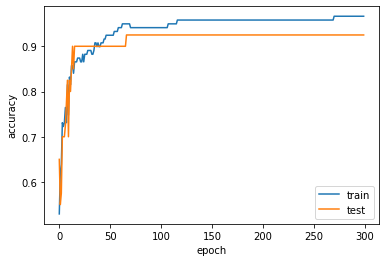

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score, label = 'train')
plt.plot(test_score, label = 'test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc = 'best')
plt.show()

초반에는 test > train : 과소적합  
100 이후 train과 test간격이 벌어짐 : 과대적합방향


In [ ]:
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
#loss = 'hinge'

sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


# SGDRegressor
- 확률적 경사 하강법을 사용한 회귀 모델 
- loss 매개변수에서 손실함수를 지정하고, 기본값은 제곱 오차를 나타내는 'squared_loss'다.

- 나머지는 SGDClassifier의 매개변수 사용법고 같음.